In [21]:
import pandas as pd 
df = pd.read_html('/DailyWiseMarketArrivals.html')
df

[                                      0
 0  DATE WISE MARKET ARRIVALS AND PRICES,
           0                                                  1        2  \
 0    Crop :              Select  Garlic  Onion  Potato  Tomato   Year :   
 1  Market :  All  ABOHAR(PB)  AGRA(UP)  AHMEDABAD(GUJ)  AHM...  Month :   
 2       NaN                                                NaN      NaN   
 
                                                    3  
 0  All  2022  2021  2020  2019  2018  2017  2016 ...  
 1  All  January  February  March  April  May  Jun...  
 2                                                NaN  ,
                                                  0
 0  DATE WISE MARKET ARRIVALS AND PRICES FOR POTATO,
              Date     Market  Arrival(q) Price Minimum (Rs/q)  \
 0     01/Jan/2005  BANGALORE        6823                  440   
 1     03/Jan/2005  BANGALORE        5046                  400   
 2     05/Jan/2005  BANGALORE        6413                  420   
 3     06/Jan/200

In [22]:
df = pd.read_html('/DailyWiseMarketArrivals.html')[-1]
df

,Date,Market,Arrival(q),Price Minimum (Rs/q),Price Maximum (Rs/q),Modal Price (Rs/q)
0,01/Jan/2005,BANGALORE,6823,440,580,510
1,03/Jan/2005,BANGALORE,5046,400,560,500
2,05/Jan/2005,BANGALORE,6413,420,560,500
3,06/Jan/2005,BANGALORE,7496,440,550,500
4,07/Jan/2005,BANGALORE,9625,410,460,425
...,...,...,...,...,...,...
4178,16/Feb/2022,BANGALORE,5780,1500,1800,1650
4179,17/Feb/2022,BANGALORE,8000,1400,1600,1500
4180,18/Feb/2022,BANGALORE,7840,1600,1800,1700
4181,22/Feb/2022,BANGALORE,7180,1600,2000,1800


In [23]:
df = df.dropna() #deletes the entire row
df

,Date,Market,Arrival(q),Price Minimum (Rs/q),Price Maximum (Rs/q),Modal Price (Rs/q)
0,01/Jan/2005,BANGALORE,6823,440,580,510
1,03/Jan/2005,BANGALORE,5046,400,560,500
2,05/Jan/2005,BANGALORE,6413,420,560,500
3,06/Jan/2005,BANGALORE,7496,440,550,500
4,07/Jan/2005,BANGALORE,9625,410,460,425
...,...,...,...,...,...,...
4177,15/Feb/2022,BANGALORE,9680,1500,1800,1650
4178,16/Feb/2022,BANGALORE,5780,1500,1800,1650
4179,17/Feb/2022,BANGALORE,8000,1400,1600,1500
4180,18/Feb/2022,BANGALORE,7840,1600,1800,1700


In [24]:
df.rename(columns = {'Date':'ds','Modal Price (Rs/q)':'y'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [25]:
df_new = df[['ds','y']]
df_new

,ds,y
0,01/Jan/2005,510
1,03/Jan/2005,500
2,05/Jan/2005,500
3,06/Jan/2005,500
4,07/Jan/2005,425
...,...,...
4177,15/Feb/2022,1650
4178,16/Feb/2022,1650
4179,17/Feb/2022,1500
4180,18/Feb/2022,1700


In [26]:
df_new['ds'] = pd.to_datetime(df_new['ds']) #format specifiers may be needed sometimes 
df_new['y'] = df_new['y'].astype(int)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4182 entries, 0 to 4181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      4182 non-null   datetime64[ns]
 1   y       4182 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 98.0 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


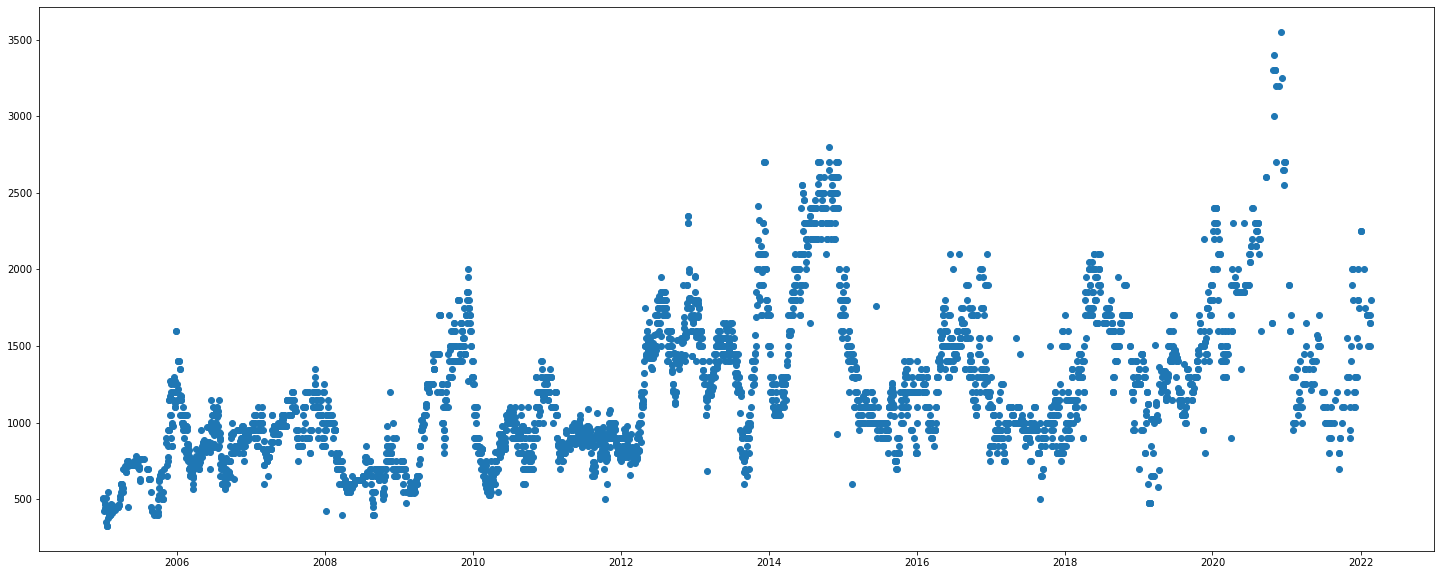

In [27]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(25,10))
plt.scatter(df_new['ds'],df_new['y'])
plt.show()

In [28]:
import numpy as np
df_new['y'] = np.where(df_new['y']>2700,np.nan,df_new['y'])
df_new 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ds,y
0,2005-01-01,510.0
1,2005-01-03,500.0
2,2005-01-05,500.0
3,2005-01-06,500.0
4,2005-01-07,425.0
...,...,...
4177,2022-02-15,1650.0
4178,2022-02-16,1650.0
4179,2022-02-17,1500.0
4180,2022-02-18,1700.0


In [29]:
df_new.isnull().sum()

ds     0
y     11
dtype: int64

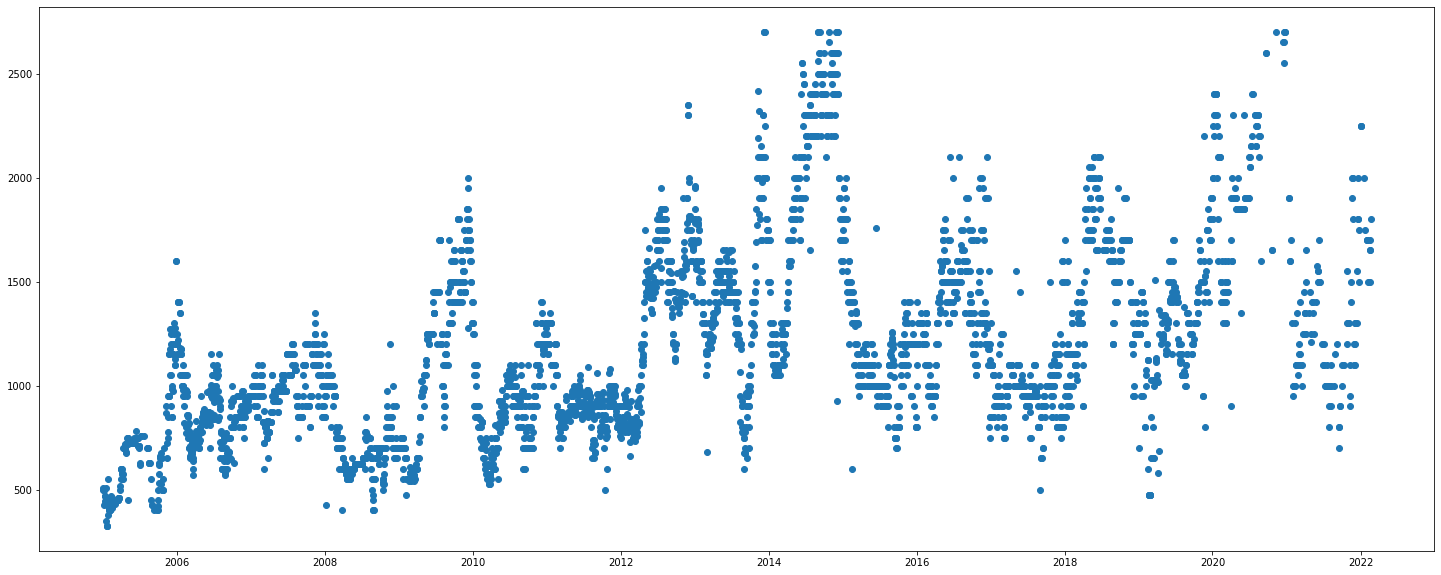

In [30]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(25,10))
plt.scatter(df_new['ds'],df_new['y'])
plt.show()

In [31]:
import fbprophet #import the library 
model = fbprophet.Prophet(changepoint_prior_scale=1)  #calling the algorithm 
model.fit(df_new) 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
forecast = model.make_future_dataframe(periods = 500, freq = 'D') #forecasting the future values 
forecast = model.predict(forecast) #predicting the output 

In [33]:


import joblib 
joblib.dump(model,'forecast_model',compress=3)

['forecast_model']

In [34]:
import joblib
reload_model = joblib.load('forecast_model')

In [35]:
forecast1 = reload_model.make_future_dataframe(periods = 20,freq = 'M')
forecast1 = reload_model.predict(forecast1)

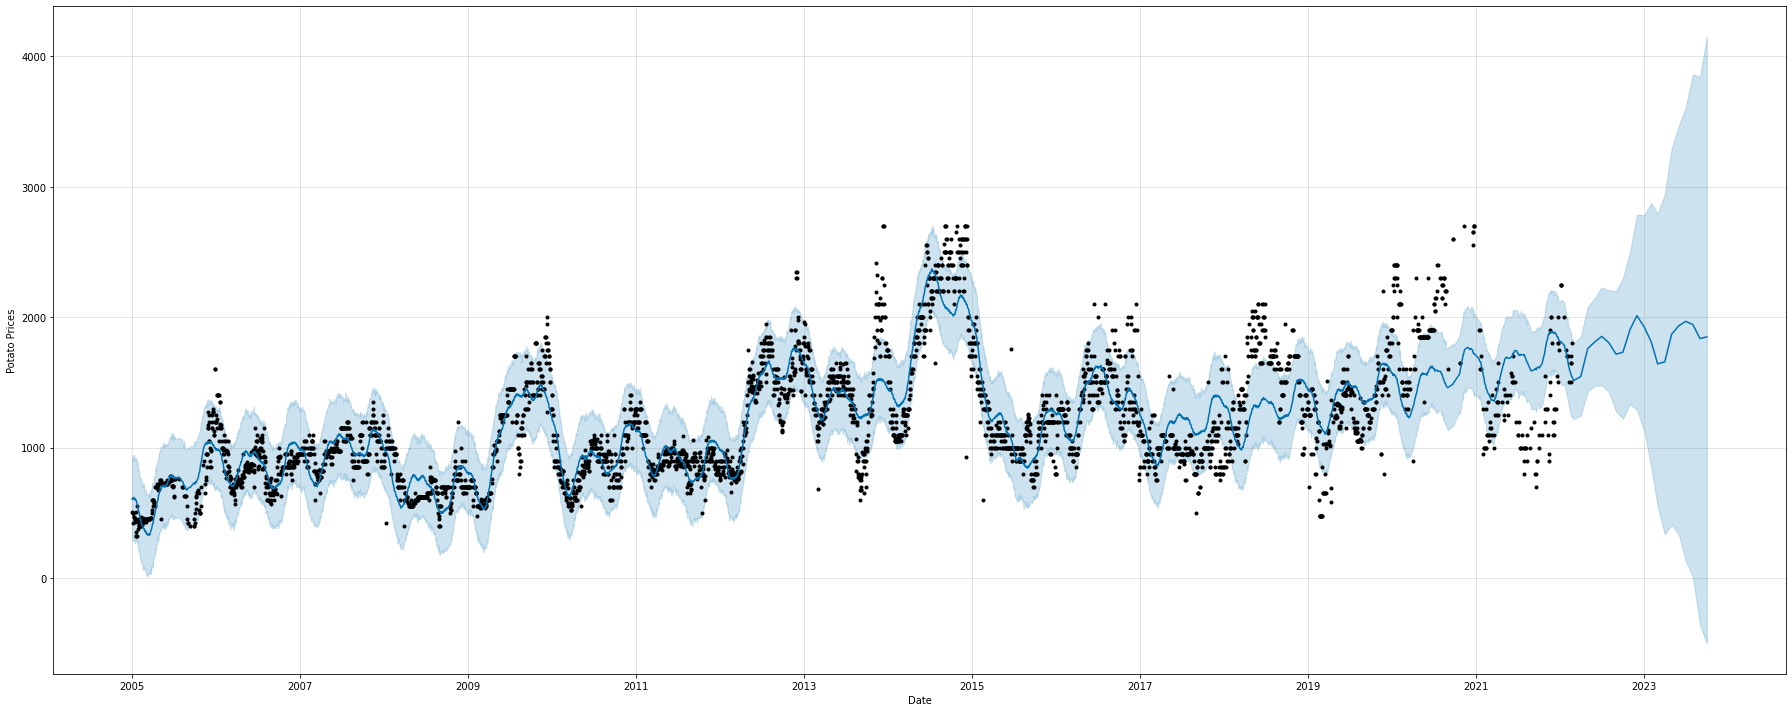

In [36]:
reload_model.plot(forecast1,xlabel = 'Date',ylabel = 'Potato Prices',figsize=(25,10))
plt.show()